# requests

## Documentation

- https://2.python-requests.org/en/master/

## request.get()

### Basic requests.get

In [36]:
import requests

url = 'http://www.google.com'

response = requests.get(url)

info = f"""{{
url:  {response.url},\n\n
code:  {response.status_code},\n\n
headers: {response.headers},\n\n
encoding: {response.encoding},\n\n
cookies: {response.cookies},\n\n
elapsed: {response.elapsed},\n\n
history: {response.history},\n\n
json: {response.json},\n\n
text: {response.text},\n\n
content: {response.content}
}}"""

print(info)


{
url:  https://www.google.com/,


code:  200,


headers: {'Date': 'Mon, 08 Jul 2019 04:14:36 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2019-07-08-04; expires=Wed, 07-Aug-2019 04:14:36 GMT; path=/; domain=.google.com, NID=187=BVTKvifh3KZmvRAS5JRNYS3u3sSRQ-50KglE3GAZ__aUQlyO9z-hdIMVP3Wog-nCrV6gjAk-IhZFNJBvZwVTOTJChUJD8k0efl5OHbPt0w4wDl0D9wvkL_dfSS0y4yxls5NiJUE5SDaFgWl8vS58aAihiDrkQxcYgExwM_nvDFQ; expires=Tue, 07-Jan-2020 04:14:36 GMT; path=/; domain=.google.com; HttpOnly', 'Alt-Svc': 'quic=":443"; ma=2592000; v="46,43,39"', 'Transfer-Encoding': 'chunked'},


encoding: ISO-8859-1,


cookies: <RequestsCookieJar[<Cookie 1P_JAR=2019-07-08-04 for .google.com/>, <Cookie NID=187=BVTKvifh3KZmvRAS5JRNYS3u3sSRQ-50KglE3GAZ__aUQlyO9z-hd

### requests with pillow to get image

{
url: https://www.w3schools.com/w3css/img_lights.jpg,

status_code: 200,

}
C:\Users\hpzju\Desktop\MyKB\FullStack\data\img_lights.jpg
{
size: (600, 400),

format: JPEG,

mdoe: RGB

}


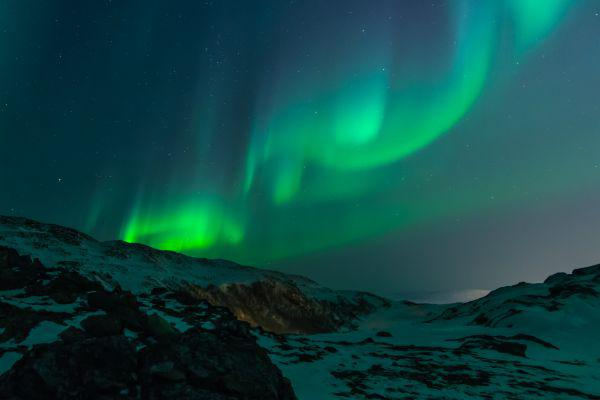

In [24]:
import requests
from PIL import Image
from io import BytesIO
from urllib import parse
import os
from IPython.display import Image as IMG, display

imgURL = r"https://www.w3schools.com/w3css/img_lights.jpg"


response = requests.get(imgURL)

print(f"""{{
url: {response.url},\n
status_code: {response.status_code},\n
}}""")

image = Image.open(BytesIO(response.content))
img_name = parse.urlsplit(imgURL).path.split("/")[-1]

img_file = os.path.join(os.getcwd(),"data", img_name)
print(img_file)

print(f"""{{
size: {image.size},\n
format: {image.format},\n
mdoe: {image.mode}\n
}}""")

try:
    image.save(img_file)
except Exception as e:
    print(f"save image failed: {e}")

display(IMG(img_file))

### requests.get with headers specified

In [34]:
import requests

url = 'https://icanhazdadjoke.com/'

h = {"Accept": "application/json"}
# h = {"Accept": "text/plain"}

response = requests.get(url, headers = h)

data = response.json()

print(type(data), data)

info = f"""{{
url:   {url},
code: {response.status_code},
headers: {response.headers},
encoding: {response.encoding},
cookies: {response.cookies},
elapsed: {response.elapsed}
history: {response.history},
json: {response.json()},
text: {response.text}
}}"""
# print(info)

<class 'dict'> {'id': 'hNu4oORnOmb', 'joke': 'What do you call cheese by itself? Provolone.', 'status': 200}


### requests.get with fake UA

Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.3319.102 Safari/537.36
<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <meta content="no-transform" http-equiv="Cache-Control"/>
   <meta content="no-siteapp" http-equiv="Cache-Control"/>
   <meta content="zh-CN" http-equiv="Content-language"/>
   <meta content="telephone=no" name="format-detection"/>
   <meta content="pc" name="applicable-device"/>
   <link href="https://m.lianjia.com/sx/ershoufang/keqiaoqu/" media="only screen and (max-width: 640px)" rel="alternate"/>
   <meta content="format=html5;url=https://m.lianjia.com/sx/ershoufang/keqiaoqu/" name="mobile-agent"/>
   <script>
    ljConf = {
    city_id: '330600',
    city_abbr: 'sx',
    city_name: '绍兴',
    channel: 'ershoufang',
    page: 'ershoufang_search',
    pageConfig: {"ajaxroot":"https:\/\/ajax.api.lianjia.com\/","imAppid":"LIAN
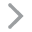
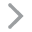

In [15]:
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup


ua = UserAgent()
print(ua.chrome)

h = {'user-agent': ua.chrome}

url = 'https://sx.lianjia.com/ershoufang/keqiaoqu/'

response = requests.get(url, headers = h )

htmlData = response.text

soup = BeautifulSoup(htmlData, 'html.parser')



print(soup.prettify())

### requests.get with headers and parameters specified

In [45]:
import requests

url = 'https://icanhazdadjoke.com/search'
h = {"Accept": "application/json"}
p = {"page": 1, "limit": 10, "term": "cat"}

response = requests.get(url, headers = h, params = p)

data = response.json() 

print(data)

{'current_page': 1, 'limit': 10, 'next_page': 1, 'previous_page': 1, 'results': [{'id': 'iGJeVKmWDlb', 'joke': 'My cat was just sick on the carpet, I don’t think it’s feline well.'}, {'id': '8UnrHe2T0g', 'joke': '‘Put the cat out’ … ‘I didn’t realize it was on fire'}, {'id': 'daaUfibh', 'joke': 'Why was the big cat disqualified from the race? Because it was a cheetah.'}, {'id': '0wcFBQfiGBd', 'joke': 'Did you hear the joke about the wandering nun? She was a roman catholic.'}, {'id': 'BQfaxsHBsrc', 'joke': 'What do you call a pile of cats?  A Meowtain.'}, {'id': 'AQn3wPKeqrc', 'joke': 'It was raining cats and dogs the other day. I almost stepped in a poodle.'}, {'id': 'O7haxA5Tfxc', 'joke': 'Where do cats write notes?\r\nScratch Paper!'}, {'id': '1wkqrcNCljb', 'joke': "Did you know that protons have mass? I didn't even know they were catholic."}, {'id': 'TS0gFlqr4ob', 'joke': 'What do you call a group of disorganized cats? A cat-tastrophe.'}, {'id': '39Etc2orc', 'joke': 'Why did the man

## request.post()

In [34]:
import requests

headers = {'content-type' : 'application/json'}

data ={"userId":101 ,"id":101, "title": "test post", "body": "post from python requests.post"}

url = "https://jsonplaceholder.typicode.com/posts"

response = requests.post(url,params=data,headers=headers)


info = f"""{{
url:   {response.url},
code: {response.status_code},
headers: {response.headers},
encoding: {response.encoding},
cookies: {response.cookies},
elapsed: {response.elapsed}
history: {response.history},
json: {response.json()},
text: {response.text}
}}"""

print(info)

{
url:   https://jsonplaceholder.typicode.com/posts?userId=101&id=101&title=test+post&body=post+from+python+requests.post,
code: 201,
headers: {'Date': 'Mon, 08 Jul 2019 03:58:22 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '15', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d3d51f36bad2c7ebd60b80a7f2abc9afb1562558302; expires=Tue, 07-Jul-20 03:58:22 GMT; path=/; domain=.typicode.com; HttpOnly', 'X-Powered-By': 'Express', 'Vary': 'Origin, X-HTTP-Method-Override, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Expires': '-1', 'Access-Control-Expose-Headers': 'Location', 'Location': 'http://jsonplaceholder.typicode.com/posts?userId=101&id=101&title=test+post&body=post+from+python+requests.post/101', 'X-Content-Type-Options': 'nosniff', 'Etag': 'W/"f-4jjw4Y8q22Yv1PV9m28FczJgjzk"', 'Via': '1.1 vegur', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beaco